# DESAFIO 04 - CICLO DE RANKINE

In [1]:
#importar bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import integrate

Para calcular a energia de nossa combustão, utilizamos a fórumla:


$$ \Delta H = \Delta U + \Delta V $$


Substituíndo pelos valores encontrados no desafio anterior, vamos ter o seguinte:

* pressão(p) = 1 atm
* Delta H = 3037.7 kJ/mol      (+/-0.8 kJ/mol)
* Delta V = 
* Delta U = 


### **SOBRE O CICLO**

**Ciclo de Rankine**: O ciclo de rankine ideal é um tipo de ciclo termodinâmico que ignora a irreversibilidade termodinâmica dos sistemas. Ele converte a expansão de vapor de um fluido em energia mecânica. Inicialmente, tem-se uma bomba que envia o fluido em altas pressões para um boiler. Nesse boiler, o líquido, que acaba por evaporar, absorve energia proveninente de um combustível (fonte quente). Assim, o fluido no estado de vapor e em altas pressões, é guiado para uma turbina. Nessa turbina, a pressão do vapor faz com que esta se mova (coversão em energia mecânica), de modo que esse movimento esteja conectado a um gerador elétrico (conversão em energia elétrica). Nota-se que grande parte da energia e pressão do fluido é perdida na conversão para energia mecânica. Após passar pela turbina, o fluido, ainda na forma de vapor (apesar de que é quase líquido) passa por um condensador, de modo em que seja submetido a pressões atmosféricas e temperatura ambiente. Nesse sentido, o fluido é, então, novamente enviado para a bomba, o que gera o reinicio do ciclo. Nota-se que o uso do Ciclo de Rankine ideal se aplica aqui pelo fato de ser isentrópico (sem variação de entropia). Caso não fosse considerado o ideal, deveria-se realizar medições experimentais da variação de entorpia.

**Ciclo de Carnot x Ciclo de Rankine:** No Ciclo de Carnot o rendimento teórico é sempre de [VERIFICAR] na conversão para energia mecânica. Já o ciclo de Rankine, baseado na diferença de maior e menor temperatura do sistema e com base em gráficos de temperatura x entropia, pode-se calcular o rendimento do sistema. O rendimento é, de fato, a principal diferença entre os vários sitemas que utilizam o Ciclo de Rankine, o que inclui termoelétricas, usinas nucleares e aplicações fotovoltaicas, por exemplo.

**Água e Ciclo de Rankine:** No Ciclo de Rankine se pode utilizar uma variedade de fluidos: metanol e CFC são exemplos possíveis. Entretanto, é mais comum que seja utilizado água para o processo. Isso se deve pois a água é uma substância de abundância em meios naturais, barata e alta capacidade calorífica. A alta capacidade calorífica é extremamente interessante principalmente pelo fato de que consegue armazenar uma grande quantidade de energia (dada a alta capacidade calorífica). Assim, consegue transmitir uma grande quantidade de calor da fonte quente para a turbina, além de que pode ser usada no condensador, para condensar o fluido. Uma terceira aplicação, considerando a alta capacidade calorífica, é o fato de que a água pode ser utilizada pra evitar o superaquecimento de núcleos de reatores nucleares.

##  Anotações para o desafio 04:

Vamos aplicar a seguinte integral para encontrar a massa de água necessária:
$$ Q = m \int_{T_0}^{T_f} C_p (T) dT$$

    
Manipulando a integral para isolar o termo de massa(m), ficamos com:
<dt>
        
$$\frac{Q}{int} = m$$

#### Cálculo da energia da combustão fornecida para a fonte quente:
Pelo Desafio 3, sabe-se que a combustão do Benzeno por mol corresponde a: -3267.5 kJ/mol \
Além disso, com um rendimento de 99% na separação, a massa total para a queima corresponde a: 496 Kg de Benzeno \
Nota-se que a massa molar do benzeno corresponde a: 78.11 g/mol

In [2]:
def converter_celsius_to_kelvin(lista_temperatura):
    array_celsius = lista_temperatura.to_numpy()
    series_kelvin = pd.Series(array_celsius + 273.15) #conversão celsius -> kelvin
    return series_kelvin

In [3]:
massa_molar_benzeno = 78.11 #g
massa_combustao_benzeno = 396 #kg
mols_combustao = 396/0.07811 #kg/kg
energia_sistema = mols_combustao * (-3267.5) #kJ
print(f'a energia fornecida para a fonte quente corresponde a: {np.round(energia_sistema,2)} kJ')

a energia fornecida para a fonte quente corresponde a: -16565484.57 kJ


In [4]:
#importar dados
df_agua_celsius = pd.read_table('cv_agua_txt.txt')
data_agua_kelvin = converter_celsius_to_kelvin(df_agua_celsius.iloc[:,0])
#célula isolada pois se rodar mais de uma vez ele soma os valores.
#df_agua_celsius

In [5]:
df_agua_celsius.iloc[:,0] = data_agua_kelvin
df_agua_kelvin = df_agua_celsius.rename(columns={'[°C]':'[K]'})
#print(df_agua_kelvin)

In [6]:
data_cv_agua = (df_agua_kelvin.iloc[3:12,2]).to_numpy()
data_temperatura_agua = (df_agua_kelvin.iloc[3:12,0]).to_numpy()

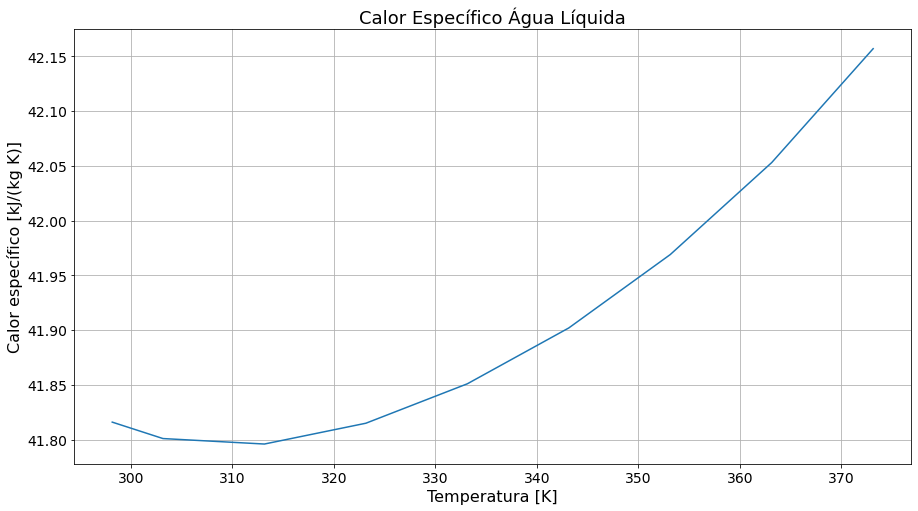

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=data_temperatura_agua,y=data_cv_agua)

#ax.errorbar(x=columns_names,y=df_statistics.iloc[1,0:],yerr=df_statistics.iloc[2,0:],ls='none',color='black',capsize=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Calor Específico Água Líquida',fontsize = 18)
plt.xlabel('Temperatura [K]',fontsize=16)
plt.ylabel('Calor específico [kJ/(kg K)]',fontsize=16)
ax.grid() #cria a grid
ax.set_axisbelow(True) #coloca a grid para trás
plt.show()
#fig.get_figure() #'pega' o gráfico para salvar
#fig.savefig("malthus_runge.png", facecolor='white') #salva o gráfico 

### Calor Latente de Vaporização:
Considerando uma aproximação para o Calor Latente: $$ \\ $$
$$ m*L \\ $$
Tal que: $$ L = 2.25*10^3 $$ J/Kg

In [8]:
### explicar por que não pegados de uma tabela

In [9]:
df_vapor_kelvin = pd.read_table('cv_vapor_txt.txt')
#df_vapor_kelvin

In [10]:
data_cv_vapor = (df_vapor_kelvin.iloc[8:18,1]).to_numpy()
#print(data_cv_vapor)
data_temperatura_vapor = (df_vapor_kelvin.iloc[8:18,0]).to_numpy()
#print(data_temperatura_vapor)

The values above apply to undissociated states. At high temperatures above 1500 K dissociation becomes appreciable and pressure is a significant variable.

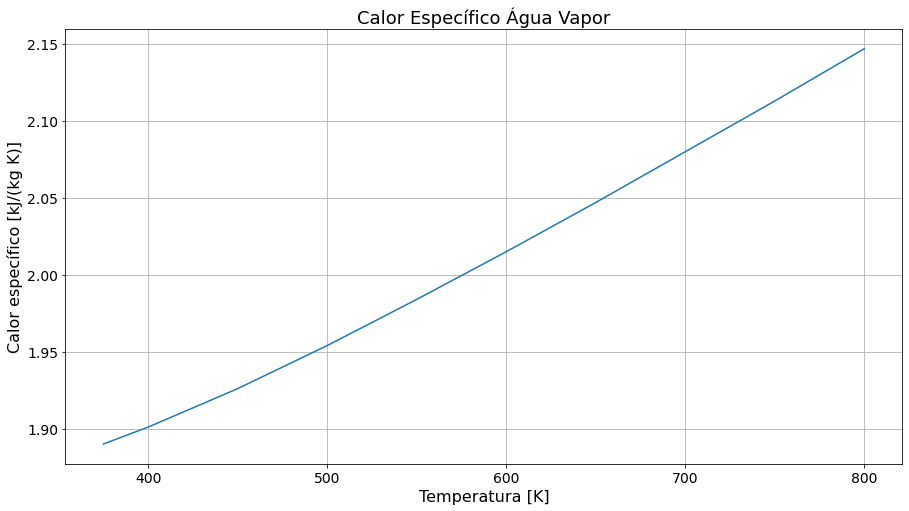

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=data_temperatura_vapor,y=data_cv_vapor)

#ax.errorbar(x=columns_names,y=df_statistics.iloc[1,0:],yerr=df_statistics.iloc[2,0:],ls='none',color='black',capsize=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Calor Específico Água Vapor',fontsize = 18)
plt.xlabel('Temperatura [K]',fontsize=16)
plt.ylabel('Calor específico [kJ/(kg K)]',fontsize=16)
ax.grid() #cria a grid
ax.set_axisbelow(True) #coloca a grid para trás
plt.show()
#fig.get_figure() #'pega' o gráfico para salvar
#fig.savefig("malthus_runge.png", facecolor='white') #salva o gráfico 

In [12]:
def massa_agua(index_1,energia_fornecida=energia_sistema,calor_especifico_agua=data_cv_agua, calor_especifico_vapor=data_cv_vapor,calor_latente=2.25e3, temperatura_agua=data_temperatura_agua, temperatura_vapor=data_temperatura_vapor):
    
    integral_agua = integrate.trapezoid(x=calor_especifico_agua,y=temperatura_agua) #integral até 100C
    #print(integral_agua)
        
    for i in range(1,index_1+1):
        integral_vapor = integrate.trapezoid(x=calor_especifico_vapor[0:i],y=temperatura_vapor[0:i])
        valor_temperatura = temperatura_vapor[i]
        #print(integral_vapor)
        m_agua = energia_fornecida/(integral_agua + integral_vapor + calor_latente) #somar calor latente?
        #print(integral_agua + integral_vapor + calor_latente)
        print(f'a massa de agua em Kg corresponde a: {np.round(np.abs(m_agua),2)}, à temperatura: {valor_temperatura} K')

In [13]:
massa_agua(index_1=len(data_cv_vapor)-1)

a massa de agua em Kg corresponde a: 6987.44, à temperatura: 400 K
a massa de agua em Kg corresponde a: 6974.9, à temperatura: 450 K
a massa de agua em Kg corresponde a: 6943.83, à temperatura: 500 K
a massa de agua em Kg corresponde a: 6905.34, à temperatura: 550 K
a massa de agua em Kg corresponde a: 6860.3, à temperatura: 600 K
a massa de agua em Kg corresponde a: 6810.03, à temperatura: 650 K
a massa de agua em Kg corresponde a: 6754.49, à temperatura: 700 K
a massa de agua em Kg corresponde a: 6693.7, à temperatura: 750 K
a massa de agua em Kg corresponde a: 6629.6, à temperatura: 800 K


### Graficos

In [20]:
#importar dados
df_agua_saturada = pd.read_table('saturated_water_txt.txt')
#df_agua_saturada

In [22]:
df_vapor_saturado = pd.read_table('saturated_vapor_txt.txt')
#df_vapor_saturado

In [23]:
data_saturated_water_temperature = df_agua_saturada.iloc[:,0].to_numpy()
data_saturated_water_pressure = df_agua_saturada.iloc[:,1].to_numpy()
data_saturated_water_volume = df_agua_saturada.iloc[:,3].to_numpy()
data_saturated_water_enthalpy = df_agua_saturada.iloc[:,5].to_numpy()
data_saturated_water_entropy = df_agua_saturada.iloc[:,6].to_numpy()

In [37]:
data_saturated_vapor_temperature = df_vapor_saturado.iloc[:,0].to_numpy()
data_saturated_vapor_pressure = df_vapor_saturado.iloc[:,1].to_numpy()
data_saturated_vapor_volume = df_vapor_saturado.iloc[:,3].to_numpy()
data_saturated_vapor_enthalpy = df_vapor_saturado.iloc[:,5].to_numpy()
data_saturated_vapor_entropy = df_vapor_saturado.iloc[:,6].to_numpy()

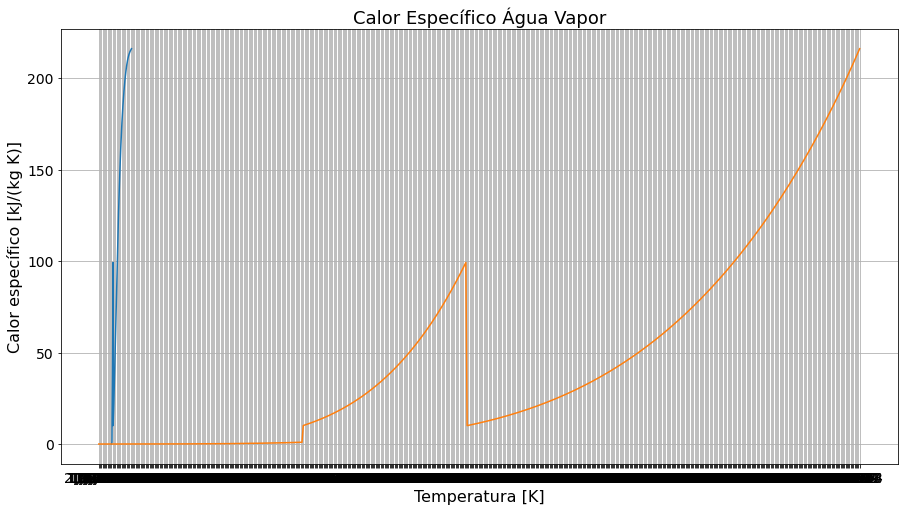

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=data_saturated_water_volume,y=data_saturated_water_pressure)
sns.lineplot(x=data_saturated_vapor_volume,y=data_saturated_vapor_pressure)

#ax.errorbar(x=columns_names,y=df_statistics.iloc[1,0:],yerr=df_statistics.iloc[2,0:],ls='none',color='black',capsize=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Calor Específico Água Vapor',fontsize = 18)
plt.xlabel('Temperatura [K]',fontsize=16)
plt.ylabel('Calor específico [kJ/(kg K)]',fontsize=16)
ax.grid() #cria a grid
ax.set_axisbelow(True) #coloca a grid para trás
plt.show()
#fig.get_figure() #'pega' o gráfico para salvar
#fig.savefig("malthus_runge.png", facecolor='white') #salva o gráfico 

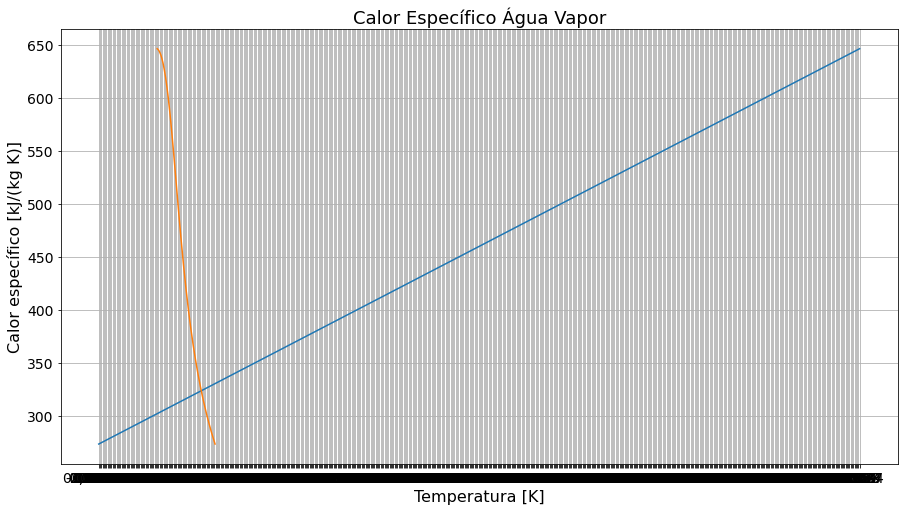

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=data_saturated_water_entropy,y=data_saturated_water_temperature)
sns.lineplot(x=data_saturated_vapor_entropy,y=data_saturated_vapor_temperature)

#ax.errorbar(x=columns_names,y=df_statistics.iloc[1,0:],yerr=df_statistics.iloc[2,0:],ls='none',color='black',capsize=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Calor Específico Água Vapor',fontsize = 18)
plt.xlabel('Temperatura [K]',fontsize=16)
plt.ylabel('Calor específico [kJ/(kg K)]',fontsize=16)
ax.grid() #cria a grid
ax.set_axisbelow(True) #coloca a grid para trás
plt.show()
#fig.get_figure() #'pega' o gráfico para salvar
#fig.savefig("malthus_runge.png", facecolor='white') #salva o gráfico 